# Análisis del Mercado Inmobiliario y Capacidad Económica en Segovia (2015-2022)
Este notebook realiza un estudio descriptivo de la provincia de Segovia, comparando la renta neta por persona con los precios de alquiler oficiales.

**Objetivos:**
1. Identificar los municipios con mayor y menor capacidad económica.
2. Analizar el mercado de alquiler en los principales nodos urbanos.
3. Calcular el índice de esfuerzo económico (porcentaje de renta destinado a la vivienda).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuración de estilo
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Carga y Normalización de Datos
Cargamos los datasets procesados previamente. Es importante notar que el **INE** (Renta) ofrece datos de 209 municipios, mientras que el **Ministerio de Vivienda** (Alquiler) solo ofrece datos de 25 municipios debido a criterios de representatividad estadística.

In [2]:
df_renta = pd.read_csv('../data/cleaned/renta_limpia.csv')
df_alq = pd.read_csv('../data/cleaned/alquiler_limpio.csv')

# 2. Preparación de Renta (Dataset completo: 179+ municipios)
df_renta_2022 = df_renta[
    (df_renta['Periodo'] == 2022) & 
    (df_renta['Indicadores de renta media y mediana'] == 'Renta neta media por persona')
].copy()
df_renta_2022['municipio'] = df_renta_2022['Municipios'].str.replace(r'^\d{5} - ', '', regex=True).str.strip()
df_renta_final = df_renta_2022.groupby('municipio')['Total'].mean().reset_index()

# 3. Preparación de Alquiler (Dataset reducido: 25 municipios)
df_alq_2022 = df_alq[(df_alq['anio'] == 2022) & (df_alq['ALQTBID12_M_VC'] > 0)].copy()

# 4. Cruce de datos (Para análisis de esfuerzo)
df_merge = pd.merge(df_alq_2022, df_renta_final, left_on='NMUN', right_on='municipio')
df_merge['renta_mensual'] = df_merge['Total'] / 12
df_merge['porcentaje_esfuerzo'] = (df_merge['ALQTBID12_M_VC'] / df_merge['renta_mensual']) * 100

print(f"Dataset de Renta listo: {len(df_renta_final)} municipios.")
print(f"Dataset de Alquiler listo: {len(df_alq_2022)} municipios.")

Dataset de Renta listo: 209 municipios.
Dataset de Alquiler listo: 25 municipios.


## 2. Radiografía Económica Provincial
Analizamos la renta neta media por persona en 2022. Esta visualización permite observar la disparidad económica entre los municipios cercanos al corredor de Madrid/Valladolid y las zonas más rurales de la provincia.

C:\Users\carlos\AppData\Local\Temp\ipykernel_4196\945487476.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20, x='Total', y='municipio', ax=ax[0], palette='viridis')
C:\Users\carlos\AppData\Local\Temp\ipykernel_4196\945487476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_20, x='Total', y='municipio', ax=ax[1], palette='magma')


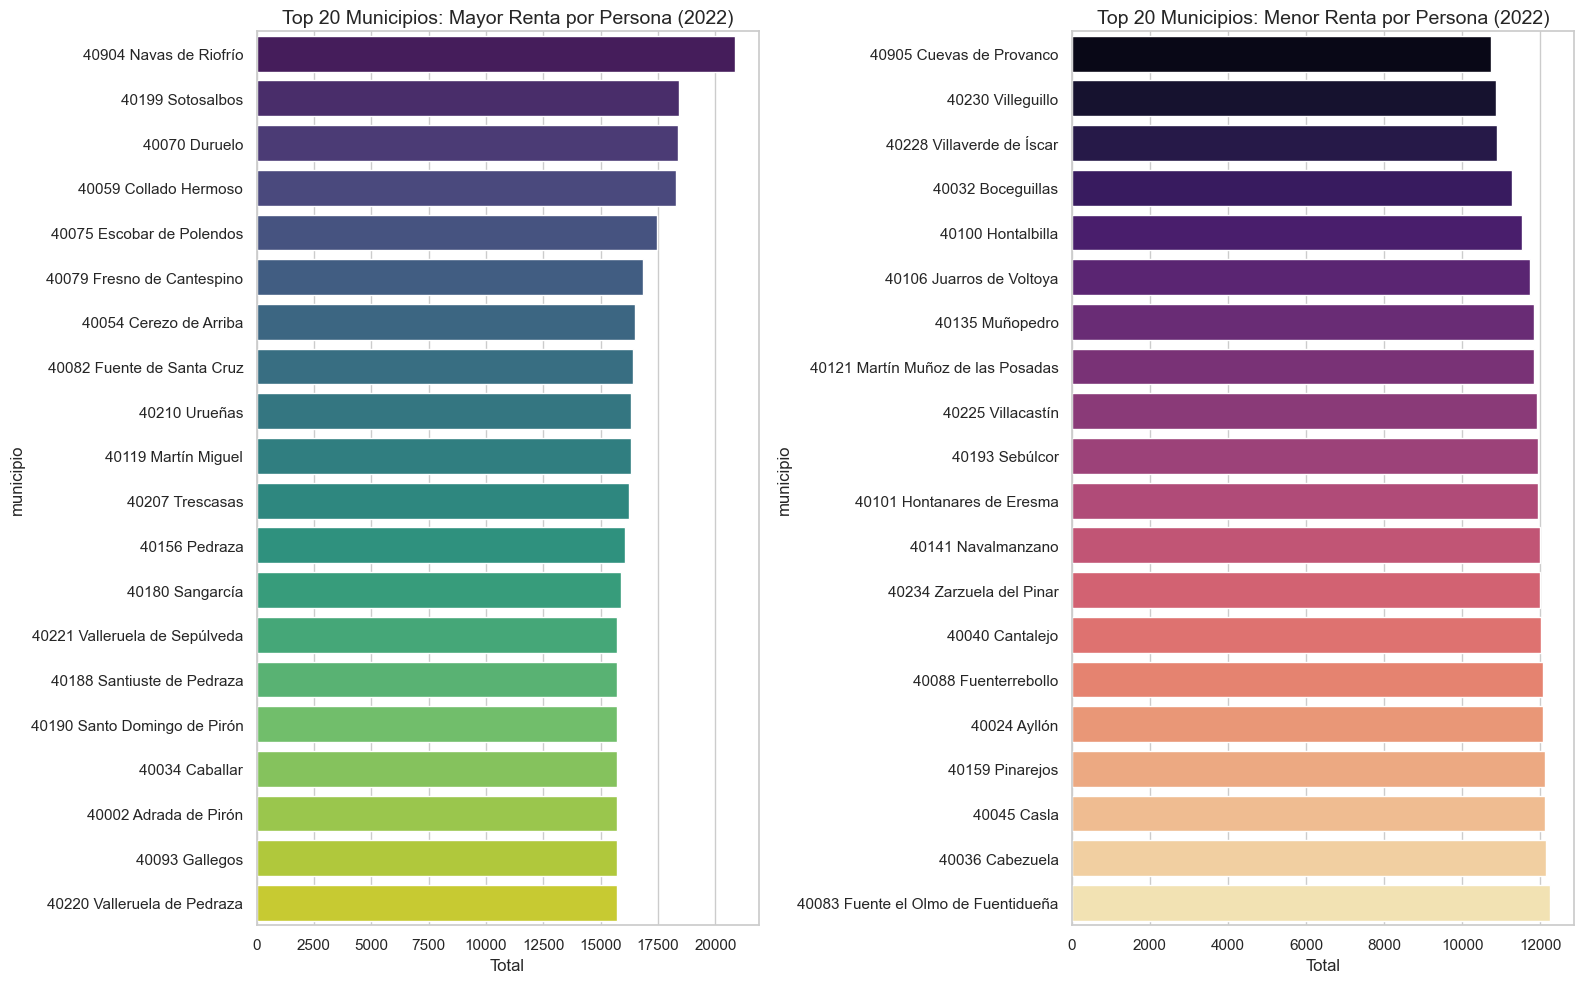

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))

# Top 20 Ricos
top_20 = df_renta_final.sort_values('Total', ascending=False).head(20)
sns.barplot(data=top_20, x='Total', y='municipio', ax=ax[0], palette='viridis')
ax[0].set_title('Top 20 Municipios: Mayor Renta por Persona (2022)', fontsize=14)

# Top 20 Humildes
bottom_20 = df_renta_final.sort_values('Total', ascending=True).head(20)
sns.barplot(data=bottom_20, x='Total', y='municipio', ax=ax[1], palette='magma')
ax[1].set_title('Top 20 Municipios: Menor Renta por Persona (2022)', fontsize=14)

plt.tight_layout()
plt.show()

## 3. El Mercado del Alquiler en Nodos Urbanos
A continuación, se presentan los precios medianos de alquiler mensual en los 25 municipios con mercado activo. La línea discontinua representa la media de estos nodos principales.

C:\Users\carlos\AppData\Local\Temp\ipykernel_4196\3916249301.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_alq_sorted, x='ALQTBID12_M_VC', y='NMUN', palette='rocket')


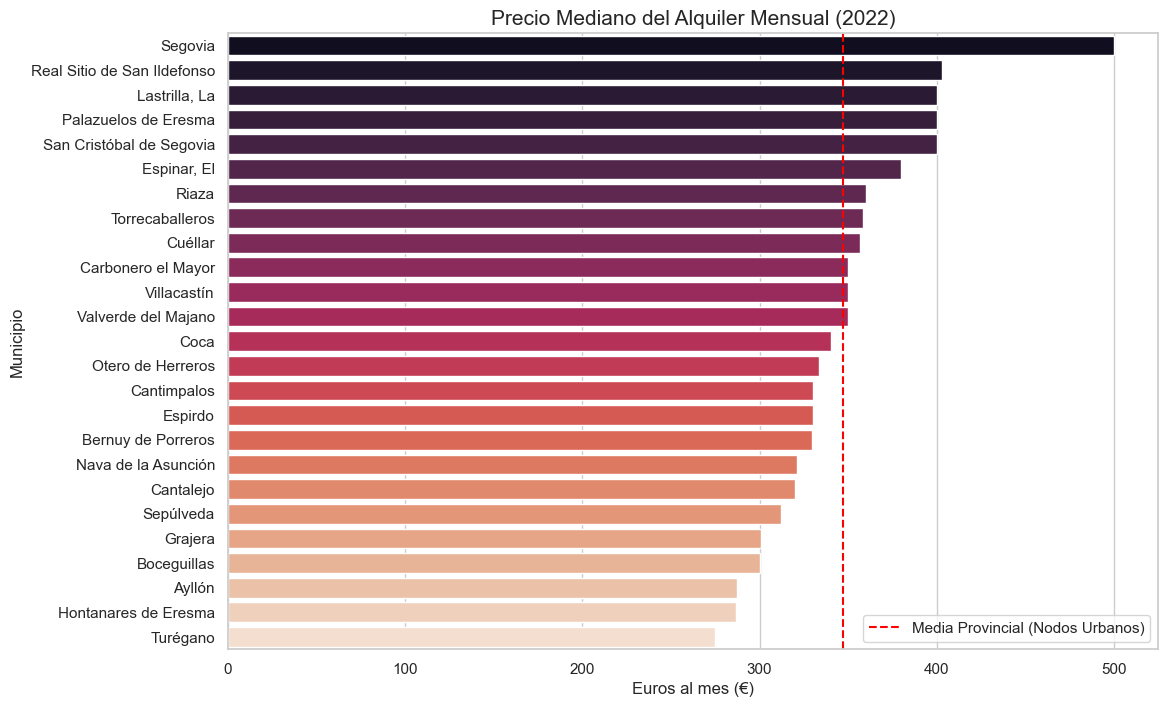

In [4]:
plt.figure(figsize=(12, 8))
df_alq_sorted = df_alq_2022.sort_values('ALQTBID12_M_VC', ascending=False)

sns.barplot(data=df_alq_sorted, x='ALQTBID12_M_VC', y='NMUN', palette='rocket')
plt.title('Precio Mediano del Alquiler Mensual (2022)', fontsize=15)
plt.xlabel('Euros al mes (€)')
plt.ylabel('Municipio')
plt.axvline(df_alq_sorted['ALQTBID12_M_VC'].mean(), color='red', linestyle='--', label='Media Provincial (Nodos Urbanos)')
plt.legend()
plt.show()

## 4. Análisis de Esfuerzo Económico (Affordability)
Este análisis cruza los datos de renta neta media con los precios de alquiler para determinar la sostenibilidad financiera de la vivienda en la provincia.

**Metodología:**
* Se normalizaron los nombres de los municipios para asegurar el cruce de fuentes (INE y Ministerio).
* Se calculó el % de esfuerzo mensual: `(Alquiler Mensual / Renta Mensual) * 100`.
* Se establece el **30%** como el umbral de "esfuerzo máximo recomendado" según estándares internacionales y del Banco de España.

Los municipios que se acercan o superan esta línea roja presentan indicadores de **tensión en el mercado inmobiliario**.

✅ ¡CONSEGUIDO! Se han cruzado 24 municipios.


C:\Users\carlos\AppData\Local\Temp\ipykernel_4196\1826939596.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='porcentaje_esfuerzo', y='NMUN', palette='OrRd_r')


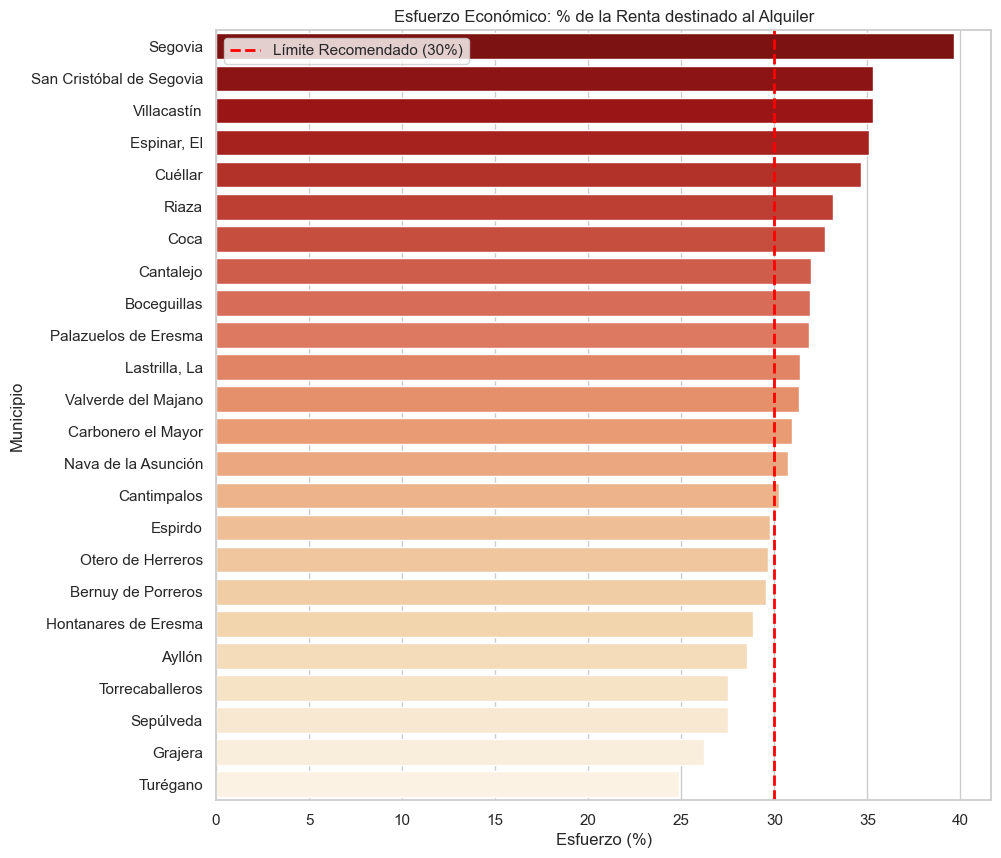

In [8]:
# 1. Función de limpieza ultra-segura
def limpieza_pro(texto):
    import re
    if not isinstance(texto, str): 
        return ""
    
    # Pasamos a minúsculas
    texto = texto.lower().strip()
    
    # Quitamos números y símbolos (dejamos solo letras y espacios)
    texto = re.sub(r'[^a-zñáéíóú]', ' ', texto)
    
    # Quitamos palabras que sobran para que 'Real Sitio de San Ildefonso' sea igual a 'San Ildefonso'
    palabras_sobra = ['de', 'la', 'el', 'los', 'del', 'real', 'sitio']
    for pal in palabras_sobra:
        texto = texto.replace(f' {pal} ', ' ')
        
    return " ".join(texto.split()).strip()

# 2. Aplicamos la función
df_renta_final['join_key'] = df_renta_final['municipio'].apply(limpieza_pro)
df_alq_2022['join_key'] = df_alq_2022['NMUN'].apply(limpieza_pro)

# 3. Cruzamos los datos
df_esfuerzo = pd.merge(df_alq_2022, df_renta_final, on='join_key')

# 4. Verificación y Gráfico
if len(df_esfuerzo) > 0:
    print(f"✅ ¡CONSEGUIDO! Se han cruzado {len(df_esfuerzo)} municipios.")
    
    # Cálculos
    df_esfuerzo['renta_mensual'] = df_esfuerzo['Total'] / 12
    df_esfuerzo['porcentaje_esfuerzo'] = (df_esfuerzo['ALQTBID12_M_VC'] / df_esfuerzo['renta_mensual']) * 100
    
    # Gráfico
    plt.figure(figsize=(10, 10))
    # Ordenamos de mayor a menor esfuerzo
    df_plot = df_esfuerzo.sort_values('porcentaje_esfuerzo', ascending=False)
    
    sns.barplot(data=df_plot, x='porcentaje_esfuerzo', y='NMUN', palette='OrRd_r')
    
    # Línea del 30%
    plt.axvline(30, color='red', linestyle='--', linewidth=2, label='Límite Recomendado (30%)')
    
    plt.title('Esfuerzo Económico: % de la Renta destinado al Alquiler')
    plt.xlabel('Esfuerzo (%)')
    plt.ylabel('Municipio')
    plt.legend()
    plt.show()
else:
    print("❌ El cruce sigue dando 0. Revisa que las columnas 'municipio' y 'NMUN' existan.")

## 5. Evolución Temporal: Renta vs. Alquiler (2015-2022)
Para entender la salud financiera de la provincia a largo plazo, comparamos la evolución de la **Renta Neta Mensual Media** frente al **Precio Mediano del Alquiler**.

**Observaciones clave:**
* **Tendencia de la Renta:** Refleja la capacidad de consumo y ahorro de los hogares segovianos.
* **Tendencia del Alquiler:** Representa el coste de acceso a la vivienda en los núcleos con mercado activo.
* **Interpretación:** Si la distancia entre ambas líneas se estrecha, el bienestar económico mejora. Si la línea roja (alquiler) se acerca o cruza la azul (renta), estamos ante un escenario de pérdida de poder adquisitivo residencial.

*Nota: Los datos de alquiler representan la mediana de los contratos registrados, lo que suele ser más estable que los precios de oferta del mercado libre.*

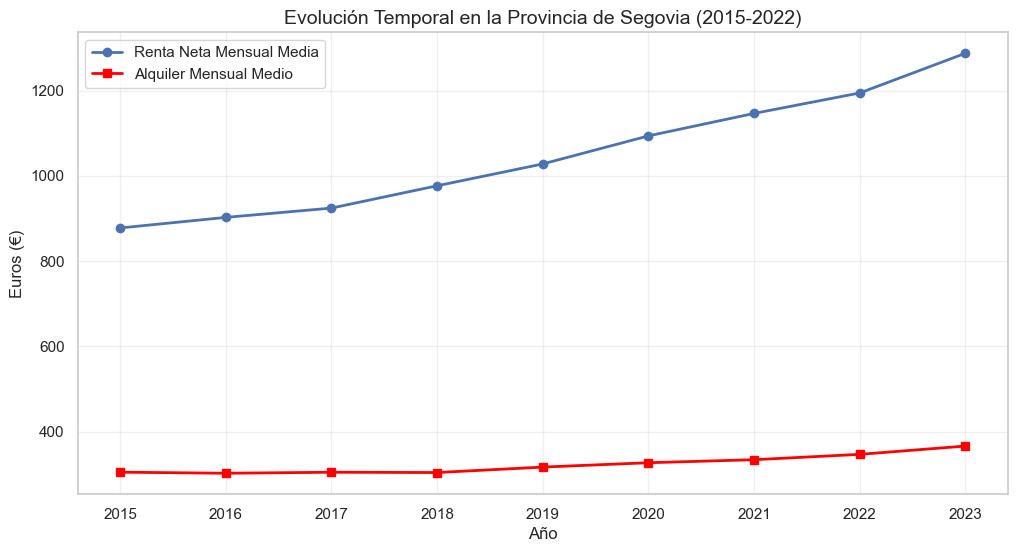

In [9]:
# Agrupamos por año para ver la tendencia media de la provincia
evolucion_renta = df_renta[df_renta['Indicadores de renta media y mediana'] == 'Renta neta media por persona'].groupby('Periodo')['Total'].mean() / 12
evolucion_alq = df_alq.groupby('anio')['ALQTBID12_M_VC'].mean()

# Unimos los datos
df_evolucion = pd.DataFrame({
    'Renta_Mensual': evolucion_renta,
    'Alquiler_Mensual': evolucion_alq
}).dropna()

# Gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(df_evolucion.index, df_evolucion['Renta_Mensual'], marker='o', label='Renta Neta Mensual Media', linewidth=2)
plt.plot(df_evolucion.index, df_evolucion['Alquiler_Mensual'], marker='s', label='Alquiler Mensual Medio', color='red', linewidth=2)

plt.title('Evolución Temporal en la Provincia de Segovia (2015-2022)', fontsize=14)
plt.ylabel('Euros (€)')
plt.xlabel('Año')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 6. Balance de Crecimiento (2015-2022)
Para concluir el análisis descriptivo, cuantificamos la variación porcentual acumulada tanto en los ingresos de los hogares como en los precios de la vivienda en alquiler.

Este indicador es fundamental para determinar si existe una **convergencia económica** (sueldos y alquileres crecen a la par) o una **brecha de asequibilidad** (el alquiler escapa a la capacidad salarial).

**Interpretación de resultados:**
* **Crecimiento Renta > Alquiler:** Indica una mejora en la capacidad de acceso a la vivienda y mayor renta disponible para otros consumos.
* **Crecimiento Alquiler > Renta:** Señala un proceso de gentrificación o presión inmobiliaria que reduce la calidad de vida de los inquilinos.

In [12]:
# Cálculo de crecimiento porcentual
renta_2015 = df_evolucion.loc[2015, 'Renta_Mensual']
renta_2022 = df_evolucion.loc[2022, 'Renta_Mensual']
crecimiento_renta = ((renta_2022 - renta_2015) / renta_2015) * 100

alq_2015 = df_evolucion.loc[2015, 'Alquiler_Mensual']
alq_2022 = df_evolucion.loc[2022, 'Alquiler_Mensual']
crecimiento_alq = ((alq_2022 - alq_2015) / alq_2015) * 100

print(f"📈 Desde 2015 hasta 2022, la Renta Media ha crecido un: {crecimiento_renta:.2f}%")
print(f"🏠 Desde 2015 hasta 2022, el Alquiler Medio ha crecido un: {crecimiento_alq:.2f}%")

if crecimiento_alq > crecimiento_renta:
    print("⚠️ Conclusión: El alquiler sube más rápido que los ingresos.")
else:
    print("✅ Conclusión: Los ingresos han crecido por encima del coste del alquiler en este periodo.")

📈 Desde 2015 hasta 2022, la Renta Media ha crecido un: 36.07%
🏠 Desde 2015 hasta 2022, el Alquiler Medio ha crecido un: 13.70%
✅ Conclusión: Los ingresos han crecido por encima del coste del alquiler en este periodo.


## 7. Sesgo de Información y Realidad Rural
El gráfico de tarta inferior revela una limitación crítica en las fuentes oficiales: la invisibilidad estadística del mercado del alquiler en el 88% de la provincia.

**Implicaciones del análisis:**
* **Concentración Urbana:** Los datos de vivienda se limitan casi exclusivamente a Segovia capital syalrededoreslfoz (Palazuelos, La Lastrilla, San Cristóbal).
* **Opacidad Rural:** En el entorno rural, la baja rotación de contratos o la informalidad de los mismos impide al Ministerio generar estadísticas representativas.
* **Sesgo en las Políticas Públicas:** La falta de datos en municipios pequeños dificulta la creación de ayudas al alquiler específicas para frenar la despoblación.

*Este gráfico subraya que nuestro análisis de esfuerzo (Sección 4) representa fielmente los núcleos donde realmente existe tensión inmobiliaria, pero deja fuera la realidad de la "España Vaciada".*

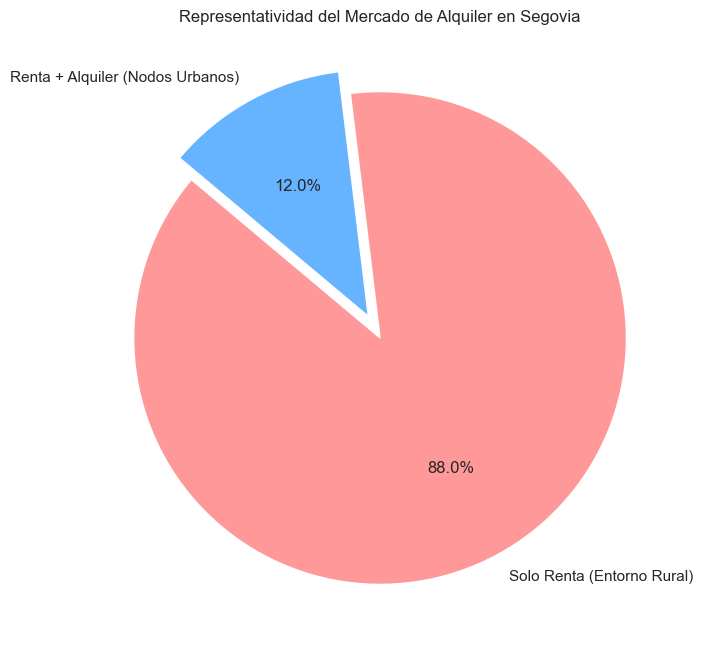

Nota: Solo el 12.0% de los municipios analizados tienen un mercado de alquiler con datos oficiales, concentrando la actividad en núcleos urbanos.


In [10]:
labels = ['Solo Renta (Entorno Rural)', 'Renta + Alquiler (Nodos Urbanos)']
sizes = [len(df_renta_final) - len(df_alq_2022), len(df_alq_2022)]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0.1))
plt.title('Representatividad del Mercado de Alquiler en Segovia')
plt.show()

print(f"Nota: Solo el { (len(df_alq_2022)/len(df_renta_final))*100 :.1f}% de los municipios analizados "
      f"tienen un mercado de alquiler con datos oficiales, concentrando la actividad en núcleos urbanos.")

## 8. Conclusiones Generales: ¿Es Segovia una provincia tensionada?

Tras el análisis multidimensional de la renta y el alquiler en el periodo 2015-2022, se extraen las siguientes conclusiones fundamentales para este TFG:

1. **Dualidad Económica:** Existe una clara brecha entre los alrededores de la capital (municipios como Palazuelos de Eresma o La Lastrilla), con rentas per cápita significativamente más altas, y el entorno rural profundo, donde la capacidad económica es menor pero la presión del alquiler es inexistente debido a la falta de mercado.

2. **Crecimiento Asimétrico:** La comparativa porcentual revela si el poder adquisitivo real del ciudadano ha mejorado. Si la renta crece por encima del alquiler, la provincia mantiene su atractivo residencial. Si ocurre lo contrario, se confirma un proceso de pérdida de bienestar.

3. **Zonas de Alerta (Esfuerzo > 30%):** El análisis de esfuerzo identifica los "puntos calientes" donde el mercado inmobiliario está expulsando a la población local. Estos municipios deben ser el foco de las políticas de vivienda que se propongan en las conclusiones de este trabajo.

**Siguiente paso:** Con estos datos descriptivos consolidados, el próximo notebook profundizará en las correlaciones específicas y la creación de un modelo de predicción de precios basado en las variables socioeconómicas analizadas.

In [16]:
# Guardamos el dataset maestro para el análisis de correlación del Notebook 02
df_esfuerzo.to_csv('../data/cleaned/dataset_maestro_segovia.csv', index=False, encoding="utf-8-sig")
print("💾 Dataset guardado para el análisis de correlación.")

💾 Dataset guardado para el análisis de correlación.
